In [138]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import pandas as pd
#import folium

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [139]:
# Etape 2 : Charger les données

In [140]:
data = pd.read_excel('Mining_Dataset.xlsx')
data

,N°,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,1,Tumbwe,27.398758,-11.479370,1356.0,1.032063,Dur
1,2,Tumbwe,27.398610,-11.478151,1354.0,27.390744,Dur
2,3,Tumbwe,27.399395,-11.476759,1354.0,1.541371,Dur
3,4,Tumbwe,27.399987,-11.475205,1354.0,1.081573,Dur
4,5,Tumbwe,27.400558,-11.474226,1353.0,1.364352,Dur
...,...,...,...,...,...,...,...
5242,5243,Gambela,27.480643,-11.614738,1285.0,1.695698,Dur
5243,5244,Gambela,27.480092,-11.614721,1284.0,3.926087,Dur
5244,5245,Gambela,27.477062,-11.612963,1287.0,1.738089,Dur
5245,5246,Gambela,27.476266,-11.613941,1279.0,11.160760,Dur


In [141]:
# Etape 3 : Analyse de données

In [142]:
print('shape of the Data:', data.shape)

shape of the Data: (5247, 7)


In [143]:
data.info

<bound method DataFrame.info of         N°     Site  Longitude   Latitude  Altitude         Ic Classe_Ic
0        1   Tumbwe  27.398758 -11.479370    1356.0   1.032063       Dur
1        2   Tumbwe  27.398610 -11.478151    1354.0  27.390744       Dur
2        3   Tumbwe  27.399395 -11.476759    1354.0   1.541371       Dur
3        4   Tumbwe  27.399987 -11.475205    1354.0   1.081573       Dur
4        5   Tumbwe  27.400558 -11.474226    1353.0   1.364352       Dur
...    ...      ...        ...        ...       ...        ...       ...
5242  5243  Gambela  27.480643 -11.614738    1285.0   1.695698       Dur
5243  5244  Gambela  27.480092 -11.614721    1284.0   3.926087       Dur
5244  5245  Gambela  27.477062 -11.612963    1287.0   1.738089       Dur
5245  5246  Gambela  27.476266 -11.613941    1279.0  11.160760       Dur
5246  5247  Gambela  27.477834 -11.614092    1284.0   5.506705       Dur

[5247 rows x 7 columns]>

In [144]:
data.isnull() .sum()

N°           0
Site         0
Longitude    0
Latitude     0
Altitude     0
Ic           0
Classe_Ic    0
dtype: int64

In [145]:
data.drop(columns='N°', axis=1, inplace=True)

In [146]:
data['Site'].unique()

array(['Tumbwe', 'LUMATA', 'MUTSHATSHA', 'CITE DE LUALABA',
       'QUARTIER MUSUMBA ', 'BUNKEYA', 'BUNGU BUNGU', 'Kasangiri',
       ' DCP Kasangiri', 'KINSEVERE', 'Gambela'], dtype=object)

In [147]:
data['Site'].value_counts()

Site
Tumbwe               4649
KINSEVERE             431
Kasangiri              27
CITE DE LUALABA        20
MUTSHATSHA             20
BUNGU BUNGU            20
QUARTIER MUSUMBA       19
LUMATA                 18
BUNKEYA                17
 DCP Kasangiri         15
Gambela                11
Name: count, dtype: int64

In [148]:
data['Longitude'].unique()

array([27.39875802, 27.39861045, 27.39939522, ..., 27.47706199,
       27.4762656 , 27.47783445])

In [149]:
data['Longitude'].value_counts()

Longitude
27.390149    3
27.397897    3
27.392147    3
27.398579    3
27.400558    3
            ..
27.480643    1
27.480092    1
27.477062    1
27.476266    1
27.396160    1
Name: count, Length: 4762, dtype: int64

In [150]:
data['Latitude'].unique()

array([-11.4793703 , -11.47815133, -11.47675851, ..., -11.6129629 ,
       -11.6139409 , -11.61409204])

In [151]:
data['Latitude'].value_counts()

Latitude
-11.475205    4
-11.479370    3
-11.470882    3
-11.474095    3
-11.474226    3
             ..
-11.614738    1
-11.614721    1
-11.612963    1
-11.613941    1
-11.582491    1
Name: count, Length: 4765, dtype: int64

In [152]:
data['Altitude'].unique()

array([1356.    , 1354.    , 1353.    , ..., 1182.5138, 1283.    ,
       1285.    ])

In [153]:
data['Altitude'].value_counts()

Altitude
1352.3340    16
1240.0000    16
1334.0000     6
1353.2520     6
1337.5600     5
             ..
1183.3166     1
1182.9129     1
1182.5138     1
1351.7110     1
1330.1040     1
Name: count, Length: 4265, dtype: int64

In [154]:
data['Ic'].value_counts()

Ic
1.032063     155
1.541371     155
1.081573     155
1.364352     155
1.193886     155
            ... 
1.695698       1
3.926087       1
1.738089       1
11.160760      1
5.506705       1
Name: count, Length: 197, dtype: int64

In [155]:
data['Classe_Ic'].unique()

array(['Dur', 'Terne', 'Mi-dur', 'Liquide', 'Mou', 'Pateux'], dtype=object)

In [156]:
data['Classe_Ic'].value_counts()

Classe_Ic
Dur        4080
Terne       628
Mi-dur      325
Liquide     201
Mou          10
Pateux        3
Name: count, dtype: int64

In [157]:
# Etape 4 : Prétraitement des données

In [158]:
classe_Dur = data[data['Classe_Ic'] == 'Dur'].iloc[ :625 , :]
classe_Dur

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,Tumbwe,27.398758,-11.479370,1356.000,1.032063,Dur
1,Tumbwe,27.398610,-11.478151,1354.000,27.390744,Dur
2,Tumbwe,27.399395,-11.476759,1354.000,1.541371,Dur
3,Tumbwe,27.399987,-11.475205,1354.000,1.081573,Dur
4,Tumbwe,27.400558,-11.474226,1353.000,1.364352,Dur
...,...,...,...,...,...,...
808,Tumbwe,27.394227,-11.474065,1348.248,1.048759,Dur
810,Tumbwe,27.394278,-11.474105,1348.453,1.032063,Dur
811,Tumbwe,27.394311,-11.474129,1348.360,27.390744,Dur
812,Tumbwe,27.394341,-11.474153,1348.697,1.541371,Dur


In [159]:
classe_Terne = data[data['Classe_Ic'] == 'Terne']
classe_Terne

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
8,Tumbwe,27.395137,-11.473340,1352.000,0.715264,Terne
9,Tumbwe,27.394444,-11.474650,1350.000,0.653490,Terne
11,Tumbwe,27.393726,-11.475818,1344.000,0.559695,Terne
29,Tumbwe,27.388280,-11.471170,1342.000,0.669784,Terne
38,Tumbwe,27.390620,-11.474792,1338.417,0.715264,Terne
...,...,...,...,...,...,...
4685,MUTSHATSHA,24.458400,-10.638600,1240.000,0.663000,Terne
4710,QUARTIER MUSUMBA,27.446298,-11.695117,1204.000,0.720000,Terne
4713,QUARTIER MUSUMBA,27.449804,-11.701423,1214.000,0.510000,Terne
4717,QUARTIER MUSUMBA,27.462209,-11.706052,1205.000,0.710000,Terne


In [160]:
classe_Mi_Dur = data[data['Classe_Ic'] == 'Mi_dur']
classe_Mi_Dur

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic


In [161]:
classe_Liquide = data[data['Classe_Ic'] == 'Liquide']
classe_Liquide

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
20,Tumbwe,27.389360,-11.471787,1341.0000,-0.794529,Liquide
50,Tumbwe,27.390919,-11.475003,1338.5070,-0.794529,Liquide
80,Tumbwe,27.391808,-11.475637,1339.0120,-0.794529,Liquide
110,Tumbwe,27.392803,-11.476314,1340.4610,-0.794529,Liquide
140,Tumbwe,27.393934,-11.476886,1343.5050,-0.794529,Liquide
...,...,...,...,...,...,...
5193,KINSEVERE,27.500284,-11.583934,1188.6369,-35.219849,Liquide
5203,KINSEVERE,27.499655,-11.583269,1187.8608,-35.219849,Liquide
5213,KINSEVERE,27.500588,-11.582730,1186.8692,-35.219849,Liquide
5223,KINSEVERE,27.501601,-11.581927,1185.9133,-35.219849,Liquide


In [162]:
data_concat = pd.concat([classe_Dur, classe_Terne, classe_Mi_Dur, classe_Liquide])
data_concat

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,Tumbwe,27.398758,-11.479370,1356.0000,1.032063,Dur
1,Tumbwe,27.398610,-11.478151,1354.0000,27.390744,Dur
2,Tumbwe,27.399395,-11.476759,1354.0000,1.541371,Dur
3,Tumbwe,27.399987,-11.475205,1354.0000,1.081573,Dur
4,Tumbwe,27.400558,-11.474226,1353.0000,1.364352,Dur
...,...,...,...,...,...,...
5193,KINSEVERE,27.500284,-11.583934,1188.6369,-35.219849,Liquide
5203,KINSEVERE,27.499655,-11.583269,1187.8608,-35.219849,Liquide
5213,KINSEVERE,27.500588,-11.582730,1186.8692,-35.219849,Liquide
5223,KINSEVERE,27.501601,-11.581927,1185.9133,-35.219849,Liquide


In [163]:
data_concat['Classe_Ic'].unique()

array(['Dur', 'Terne', 'Liquide'], dtype=object)

In [164]:
data_concat['Classe_Ic'].value_counts()

Classe_Ic
Terne      628
Dur        625
Liquide    201
Name: count, dtype: int64

In [165]:
encoder = LabelEncoder()

In [166]:
data_concat['Site'] = encoder.fit_transform(data_concat['Site'])
data_concat['Classe_Ic'] = encoder.fit_transform(data_concat['Classe_Ic'])
data_concat

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,5,27.398758,-11.479370,1356.0000,1.032063,0
1,5,27.398610,-11.478151,1354.0000,27.390744,0
2,5,27.399395,-11.476759,1354.0000,1.541371,0
3,5,27.399987,-11.475205,1354.0000,1.081573,0
4,5,27.400558,-11.474226,1353.0000,1.364352,0
...,...,...,...,...,...,...
5193,1,27.500284,-11.583934,1188.6369,-35.219849,1
5203,1,27.499655,-11.583269,1187.8608,-35.219849,1
5213,1,27.500588,-11.582730,1186.8692,-35.219849,1
5223,1,27.501601,-11.581927,1185.9133,-35.219849,1


In [167]:
data_concat['Classe_Ic'].unique()


array([0, 2, 1])

In [168]:
data_concat['Classe_Ic'].value_counts()

Classe_Ic
2    628
0    625
1    201
Name: count, dtype: int64

In [169]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1454 entries, 0 to 5233
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Site       1454 non-null   int64  
 1   Longitude  1454 non-null   float64
 2   Latitude   1454 non-null   float64
 3   Altitude   1454 non-null   float64
 4   Ic         1454 non-null   float64
 5   Classe_Ic  1454 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 79.5 KB


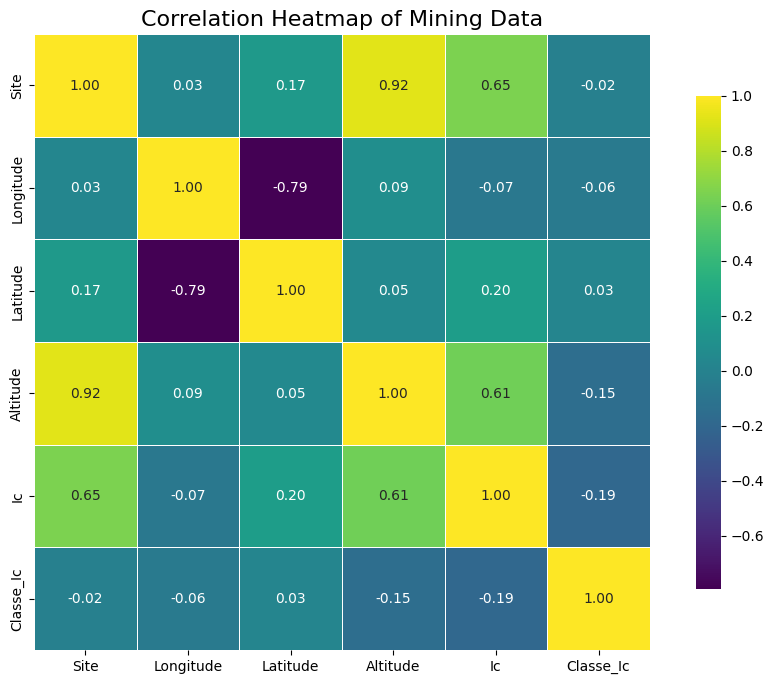

In [170]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    data_concat.corr(),
    annot=True,               # Show correlation coefficients
    fmt=".2f",                # Format the annotations to 2 decimal places
    cmap='viridis',           # Choose a different color palette
    square=True,              # Make cells square-shaped
    linewidths=0.5,          # Add lines between cells
    cbar_kws={"shrink": .8}, # Shrink the color bar
)
plt.title('Correlation Heatmap of Mining Data', fontsize=16)
plt.show()

In [171]:
#Étape 5 : Diviser les données : Train et Test

In [172]:
X = data_concat.iloc [:, :-1]
y = data_concat.iloc[:, -1]
y = to_categorical(y, num_classes=4)

In [173]:
scaler = StandardScaler()

X_normal = scaler.fit_transform(X)
#X_test = scaler.transform(X_test)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.20, random_state=27)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=27) 

In [175]:
print("X-train:", X_train.shape)
print("y-train:", y_train.shape)
print("X-val:", X_val.shape)
print("y-val:", y_val.shape)
print("X-test:", X_test.shape)
print("y-test:", y_test.shape)

X-train: (930, 5)
y-train: (930, 4)
X-val: (233, 5)
y-val: (233, 4)
X-test: (291, 5)
y-test: (291, 4)


In [176]:
X_train.shape[0] + X_val.shape[0] + X_test.shape[0]

1454

In [177]:

#Étape 6 : Construire le Shallow Neural Network et 5 Algorithmes classiques de Machine Learning

In [178]:

# Creer une instance de la Classe Sequential
model_dnn = Sequential()

# Ajout de la premiere couche
model_dnn.add(Dense(10, input_shape=(5,), activation='relu'))

# Ajout de la deuxieme couche intermediaire
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dropout(0.5))

# Ajout de la troisieme couche intermediaire
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))

# Ajout de la qautriem couche intermediaire
model_dnn.add(Dense(32, activation='relu'))

# Ajout de la couche de Sortie
model_dnn.add(Dense(4, activation='softmax'))

# Compiler le model
model_dnn.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Affichage de l'architecture du reseau de neurone
model_dnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,936 (46.62 KB)

 Trainable params: 11,936 (46.62 KB)

 Non-trainable params: 0 (0.00 B)

In [179]:
# Entrainement du modele
history = model_dnn.fit(X_train, y_train, epochs=160, verbose=1, validation_data=(X_val, y_val))

Epoch 1/160
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5574 - loss: 1.0583 - val_accuracy: 0.7854 - val_loss: 0.5140
Epoch 2/160
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7912 - loss: 0.5198 - val_accuracy: 0.9785 - val_loss: 0.1907
Epoch 3/160
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8741 - loss: 0.3952 - val_accuracy: 0.9871 - val_loss: 0.1914
Epoch 4/160
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9819 - loss: 0.1953 - val_accuracy: 0.9914 - val_loss: 0.0871
Epoch 5/160
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9922 - loss: 0.0641 - val_accuracy: 0.9914 - val_loss: 0.0989
Epoch 6/160
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9109 - loss: 0.3128 - val_accuracy: 0.9742 - val_loss: 0.2196
Epoch 7/160
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9525 - loss: 0.1730 - val_accuracy: 0.9957 - val_loss: 0.0093
Epoch 8/160
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9949 - loss: 0.0434 - val_accuracy: 1.0000 - 

In [180]:
#Étape 7 : Visualiser l’evolution de l’entrainement du réseau de neurone

In [181]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

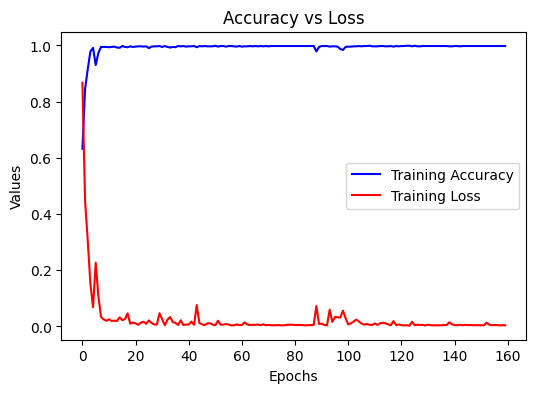

In [182]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

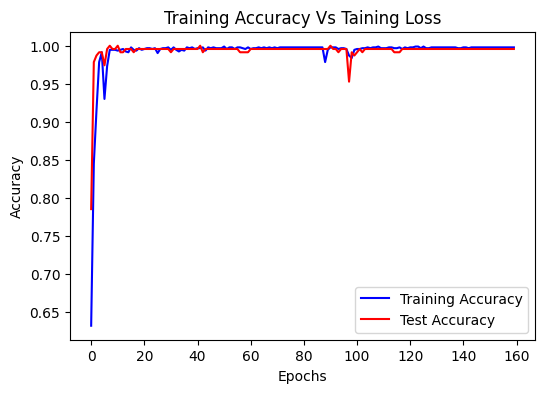

In [183]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

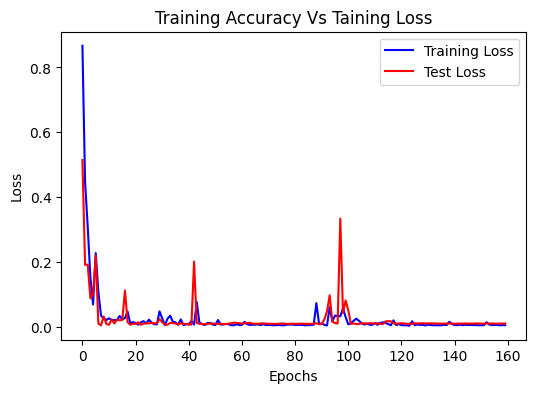

In [184]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

In [185]:
#Étape 8 : Evaluer le modèle

In [186]:
model_dnn.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 8.9036e-04 


[0.0014064982533454895, 1.0]

In [187]:
#9. Sauvegarder le modèle entrainé

In [188]:
model_dnn.save('model_dnn.h5')

In [189]:
predictions = model_dnn.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

print("Prédictions :", predicted_classes)
#predicted_classes

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prédictions : [1 2 0 0 0 0 0 1 0 2 0 2 0 1 0 0 2 2 0 2 0 0 0 0 0 1 2 0 2 0 0 0 1 2 0 0 2
 0 1 0 0 0 1 2 0 0 0 0 2 0 0 1 2 0 2 1 0 0 0 2 0 2 0 0 1 2 2 2 0 2 0 2 0 0
 1 0 2 0 1 2 0 0 2 0 2 0 2 0 2 1 2 0 0 0 0 2 2 0 0 0 0 1 0 0 0 0 2 2 1 0 2
 2 2 2 2 0 2 2 2 0 2 2 0 0 0 2 2 0 2 1 2 0 2 0 2 1 2 2 2 0 1 0 2 0 2 1 2 2
 2 0 1 0 2 2 2 0 2 0 1 0 2 2 1 1 0 0 2 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 0 2 0
 0 0 0 2 0 1 1 2 0 1 2 0 2 2 2 2 0 2 2 0 0 0 0 2 1 0 0 0 0 0 2 0 2 0 2 0 2
 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 0 2 0 2 0 0 2 0 2 1 2 2 1 0 2 0 2 0
 2 0 1 2 0 1 2 2 0 1 2 0 0 2 0 2 2 2 0 0 0 2 0 2 2 2 2 2 1 2 2 0]


In [190]:
#10. Simple Prediction

In [191]:
data_concat.head()

,Site,Longitude,Latitude,Altitude,Ic,Classe_Ic
0,5,27.398758,-11.479370,1356.0,1.032063,0
1,5,27.398610,-11.478151,1354.0,27.390744,0
2,5,27.399395,-11.476759,1354.0,1.541371,0
3,5,27.399987,-11.475205,1354.0,1.081573,0
4,5,27.400558,-11.474226,1353.0,1.364352,0


In [192]:
# Une simple prediction 

# Donnée d'entrée (5 features)
X_test_2 = np.array([[2,	27.502679,	-11.581215,	1183.3166,	-35.219849	]])
#X_test_2 = np.array([[10, 27.398758, -11.479370, 1356.0, 1.03206]])


# N'oublie pas de scaler aussi cette entrée
X_test_2 = scaler.transform(X_test_2)
print(X_test_2)

# Prédiction
prediction = model_dnn.predict(X_test_2)
predicted_class = prediction.argmax()

print("Classe prédite :", predicted_class)

[[-4.05596952  0.73293437 -1.70865469 -5.00635678 -3.85027534]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Classe prédite : 1


In [193]:
# Affichage des résultats
probs_percent = prediction[0]
#probs_percent = prediction[0] * 100
probs_rounded = np.round(probs_percent, 2)

print(f"Classe prédite : {predicted_class}")
print("Probabilités par classe (%):", probs_rounded)

Classe prédite : 1
Probabilités par classe (%): [0. 1. 0. 0.]
